In [123]:
import os
import pandas as pd

In [124]:
df = pd.read_parquet(os.path.join("data","jizdenky.parquet"))

In [125]:
df['predstih_d'] = df['predstih'].dt.days
df['predstih_h'] = df['predstih'].dt.total_seconds() / 3600

In [126]:
df.groupby(['odkud','kam'])['cena'].max().nlargest(10)

odkud                    kam               
Praha hl.n.              Amsterdam Centraal    11644.0
Amsterdam Centraal       Praha hl.n.           11463.0
Amsterdam Bijlmer ArenA  Praha hl.n.           11442.0
Brno hl.n.               Hamburg Hbf            9814.0
Berlin Hbf (tief)        Amsterdam Centraal     8488.0
Bruxelles-Midi           Praha hl.n.            8001.0
Berlin Hbf               Bruxelles-Midi         7412.0
Berlin Hbf (tief)        Praha hl.n.            7412.0
Praha hl.n.              Bruxelles-Midi         7322.0
Berlin Hbf               Hamburg Hbf            7018.0
Name: cena, dtype: float64

In [127]:
df.groupby(['odkud','kam'])['cena'].min().nlargest(20)

odkud                    kam               
Berlin Hbf               Hamburg Hbf           7018.0
                         Bruxelles-Central     6814.0
Praha-Smíchov            Bruxelles-Midi        6543.0
Bruxelles-Central        Praha hl.n.           6411.0
Amsterdam Zuid           Praha hl.n.           6311.0
Frankfurt(Main)Hbf       Bruxelles-Midi        6244.0
Amsterdam Centraal       Praha hl.n.           6215.0
Frankfurt Hbf (tief)     Praha hl.n.           6215.0
Frankfurt(Main)Hbf       Amsterdam Centraal    6215.0
Amsterdam Bijlmer ArenA  Praha hl.n.           6195.0
München Hbf              Praha hl.n.           6097.0
Berlin Hbf (tief)        Amsterdam Centraal    5578.0
Leipzig Hbf (tief)       Amsterdam Centraal    5578.0
Praha hl.n.              Amsterdam Zuid        5477.0
Železná Ruda-Alžbětín    Praha-Smíchov         5369.0
Praha hl.n.              Berlin Ostbahnhof     4149.0
Leipzig Hbf (tief)       Berlin Hbf (tief)     3277.0
                         Berlin Südkre

In [128]:
df[df['odkud'].str.contains('Praha')].groupby('kam')['cena'].max().nlargest(20)

kam
Amsterdam Centraal        11644.0
Bruxelles-Midi             7322.0
Bern                       6894.0
Amsterdam Zuid             6311.0
Berlin Hbf (tief)          5181.0
Warszawa Centralna         4324.0
Berlin Ostbahnhof          4149.0
Ljubljana                  3824.0
Zagreb Glavni kolodvor     3622.0
Berlin Gesundbrunnen       3277.0
Berlin Hbf                 3277.0
Berlin Südkreuz            3277.0
Budapest-Kelenföld         3008.0
Warszawa Wschodnia         2205.0
Bratislava-Petržalka       2085.0
Budapest-Nyugati pu        1922.0
Bratislava hl.st.          1586.0
Wien Hbf                   1550.0
Kraków Główny              1519.0
Krakow Glowny              1396.0
Name: cena, dtype: float64

In [129]:
df[df['odkud'].str.contains('Praha')].groupby(['kam','prodejce'])['cena'].min().nsmallest(40)

kam                            prodejce
Brno                           RJ            99.0
Ostrava hl.n.                  LE            99.0
Ostrava-Svinov                 LE            99.0
Tanvald                        ARR          160.0
České Budějovice               ARR          200.0
Ostrava                        RJ           249.0
Brno hl.n.                     ČD           269.0
Bratislava                     RJ           279.0
Kraków Główny                  LE           279.0
Ostrava hl.n.                  ČD           289.0
Ostrava-Svinov                 ČD           289.0
Vídeň                          RJ           299.0
Krakov                         RJ           319.0
Plzeň hl.n.                    ČD           350.0
Krakow Glowny                  ČD           361.0
Berlin Hbf (tief)              ČD           387.0
Berlin Südkreuz                ČD           387.0
Wien Hbf                       ČD           387.0
Budapešť                       RJ           399.0
Košice    

In [130]:
df[df['odkud'].str.contains('Brno')].groupby(['kam','prodejce'])['cena'].min().nsmallest(50)

kam               prodejce
Praha             RJ            99.0
Vídeň             RJ           149.0
Ostrava           RJ           189.0
Praha hl.n.       ČD           269.0
Praha-Holešovice  ČD           479.0
Hamburg Hbf       ČD           645.0
Ljubljana         ČD          1109.0
Hamburg-Harburg   ČD             NaN
Name: cena, dtype: float64

In [131]:
df.groupby('predstih_d')['cena'].median()

predstih_d
-8        NaN
-7        NaN
-6        NaN
-5        NaN
-4        NaN
        ...  
 89    1275.5
 90    1264.0
 91       NaN
 92       NaN
 93       NaN
Name: cena, Length: 102, dtype: float64

In [132]:
df.sort_values('predstih_d')

,vlaky,prodejce,prostredek,odkud,oscrapovano,kam,odjezd,predstih,vzdalenost,jizdni_doba,...,den,prestupy,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,predstih_d,predstih_h
385,"[R 1166, R 1168]",ARR,vlak,Praha hl.n.,2024-11-07 18:29:00,České Budějovice,2024-10-31 14:42:00,-8 days +20:13:00,187.0,311.0,...,None,NaN,None,None,NaN,NaN,NaN,NaN,-8,-171.783333
397,"[R 1166, R 1168]",ARR,vlak,Praha hl.n.,2024-11-07 18:29:01,České Budějovice,2024-10-31 14:42:00,-8 days +20:12:59,187.0,311.0,...,None,NaN,None,None,NaN,NaN,NaN,NaN,-8,-171.783611
384,[R 1170],ARR,vlak,Praha hl.n.,2024-11-07 18:29:00,České Budějovice,2024-10-31 16:42:00,-8 days +22:13:00,187.0,203.0,...,None,NaN,None,None,NaN,NaN,NaN,NaN,-8,-169.783333
415,[R 1164],ARR,vlak,Praha hl.n.,2024-11-07 18:29:01,České Budějovice,2024-10-31 10:42:00,-8 days +16:12:59,187.0,203.0,...,None,NaN,None,None,NaN,NaN,NaN,NaN,-8,-175.783611
421,[R 1170],ARR,vlak,Praha hl.n.,2024-11-07 18:29:01,České Budějovice,2024-10-31 16:42:00,-8 days +22:12:59,187.0,203.0,...,None,NaN,None,None,NaN,NaN,NaN,NaN,-8,-169.783611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9045,"[EC 141 Ostravan, Os 2964, EC 59 Galicja]",ČD,vlak,Olomouc hl.n.,2024-11-07 09:12:02,Przemysl Gl.,2025-02-07 10:44:00,92 days 01:31:58,NaN,484.0,...,pátek,2.0,None,None,NaN,NaN,NaN,NaN,92,2209.532778
8945,"[R 658 Bezdrev, IC 566 Západní expres, Sp 5282...",ČD,vlak,München Hbf Gl.27-36,2024-11-03 09:54:26,Zürich HB,2025-02-04 12:54:00,93 days 02:59:34,NaN,623.0,...,úterý,4.0,None,None,NaN,NaN,NaN,NaN,93,2234.992778
8940,"[Sp 3803 Vltava Dunaj, rjx 862, R 5728, IR 327...",ČD,vlak,České Budějovice,2024-11-03 09:54:26,Zürich HB,2025-02-04 10:05:00,93 days 00:10:34,NaN,617.0,...,úterý,4.0,None,None,NaN,NaN,NaN,NaN,93,2232.176111
8968,"[Sp 3805 Vltava Dunaj, rjx 168]",ČD,vlak,České Budějovice,2024-11-03 09:54:26,Zürich HB,2025-02-04 14:05:00,93 days 04:10:34,NaN,555.0,...,úterý,1.0,None,None,NaN,NaN,NaN,NaN,93,2236.176111


<Axes: xlabel='predstih_d'>

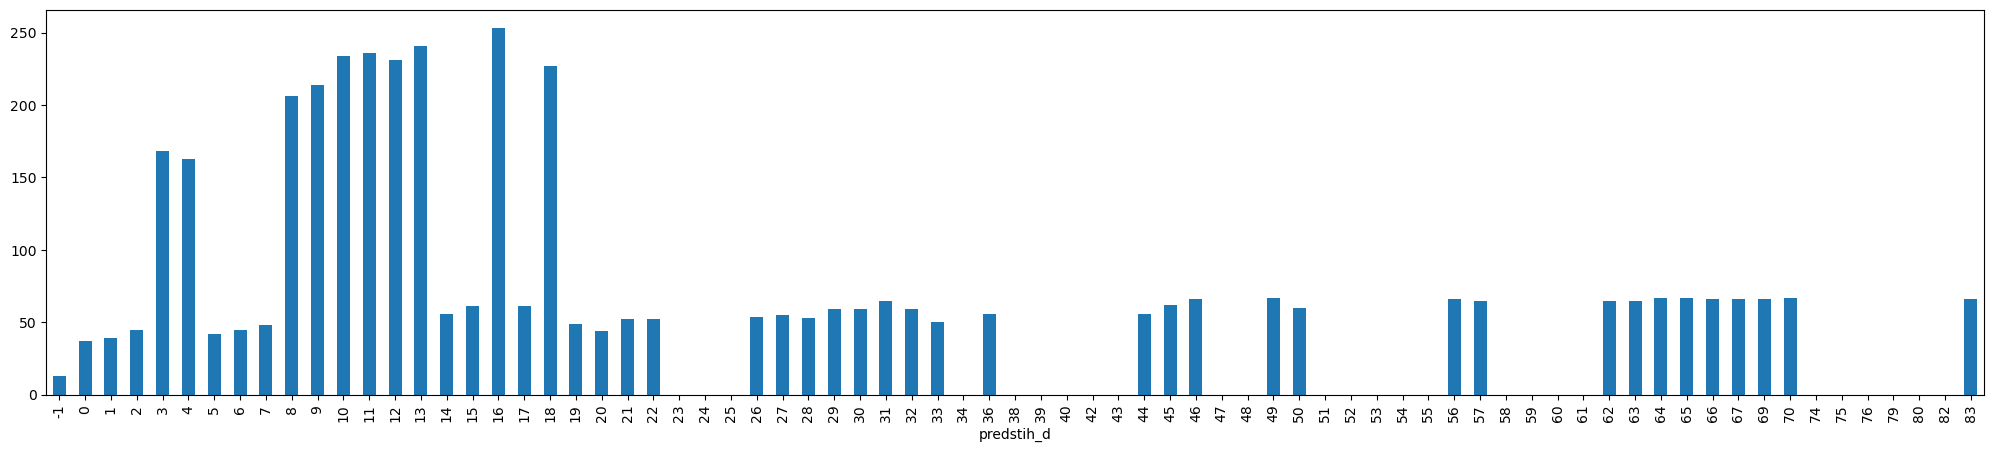

In [133]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Ostrava')].groupby('predstih_d')['volnych_mist'].median().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

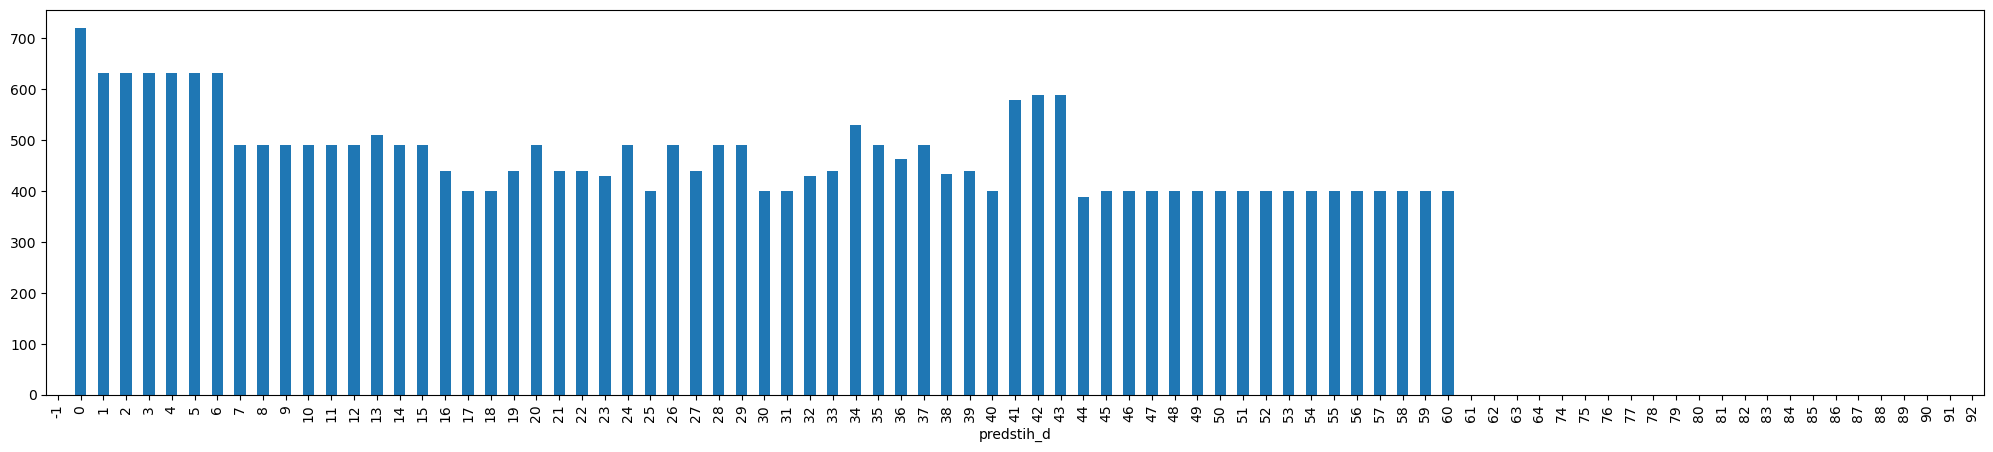

In [134]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Bratisla')].groupby('predstih_d')['cena'].median().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

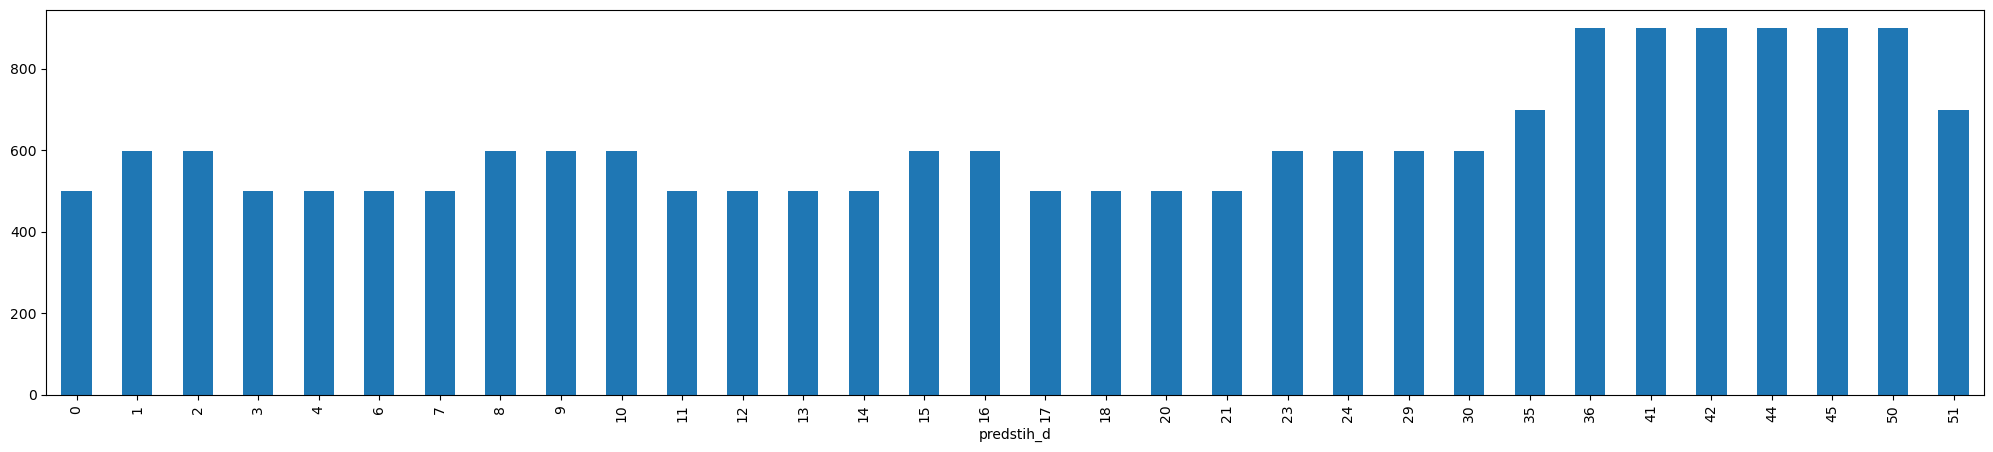

In [135]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Čop')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

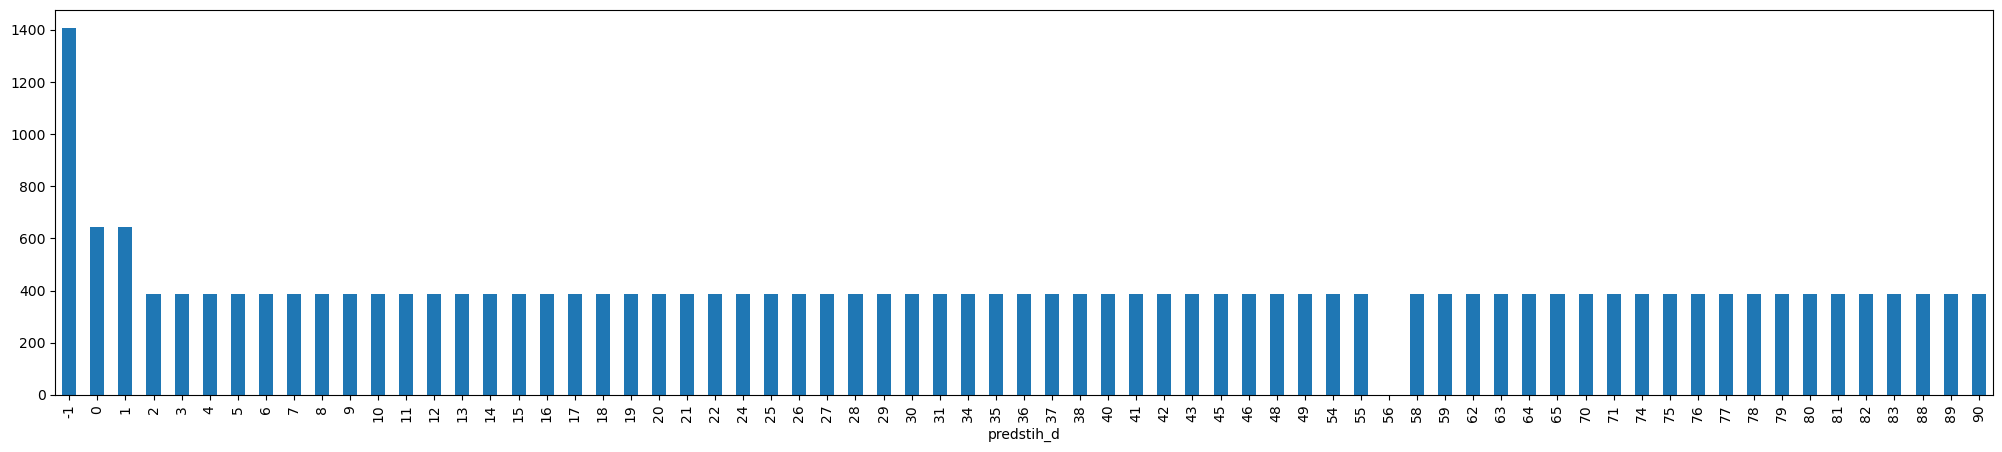

In [136]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Wien')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

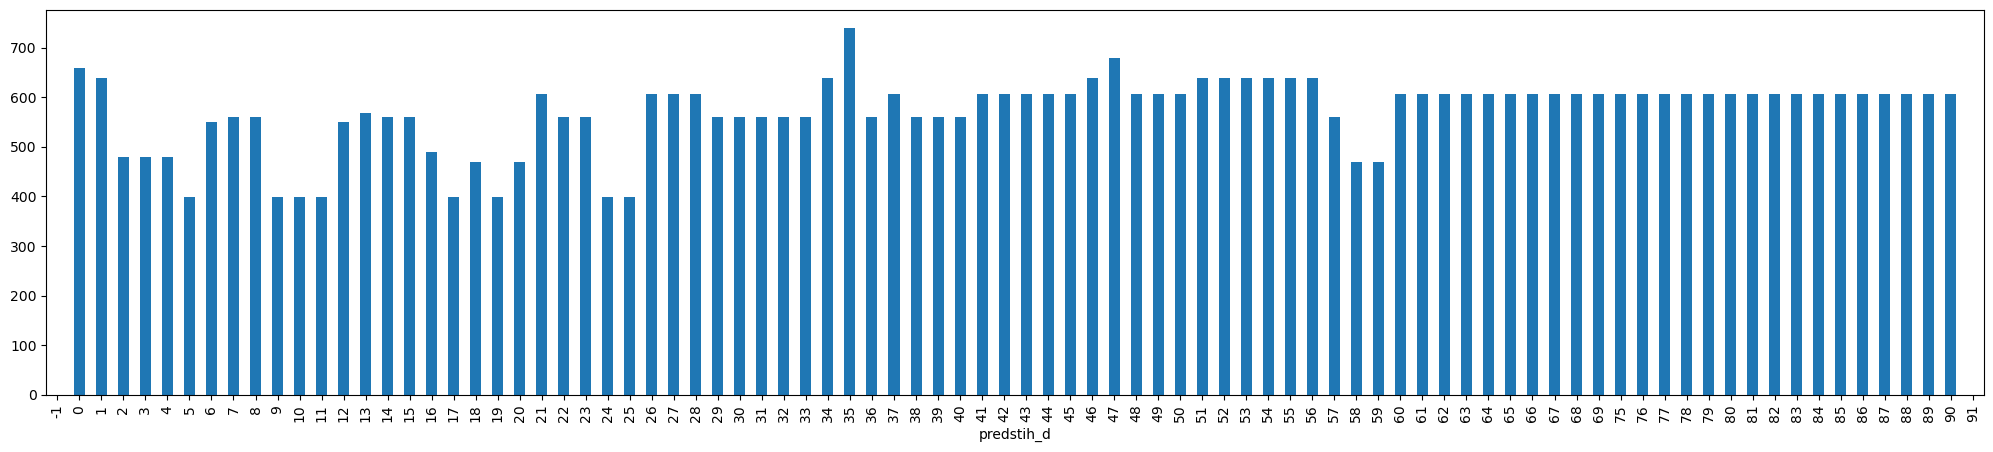

In [137]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Buda')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

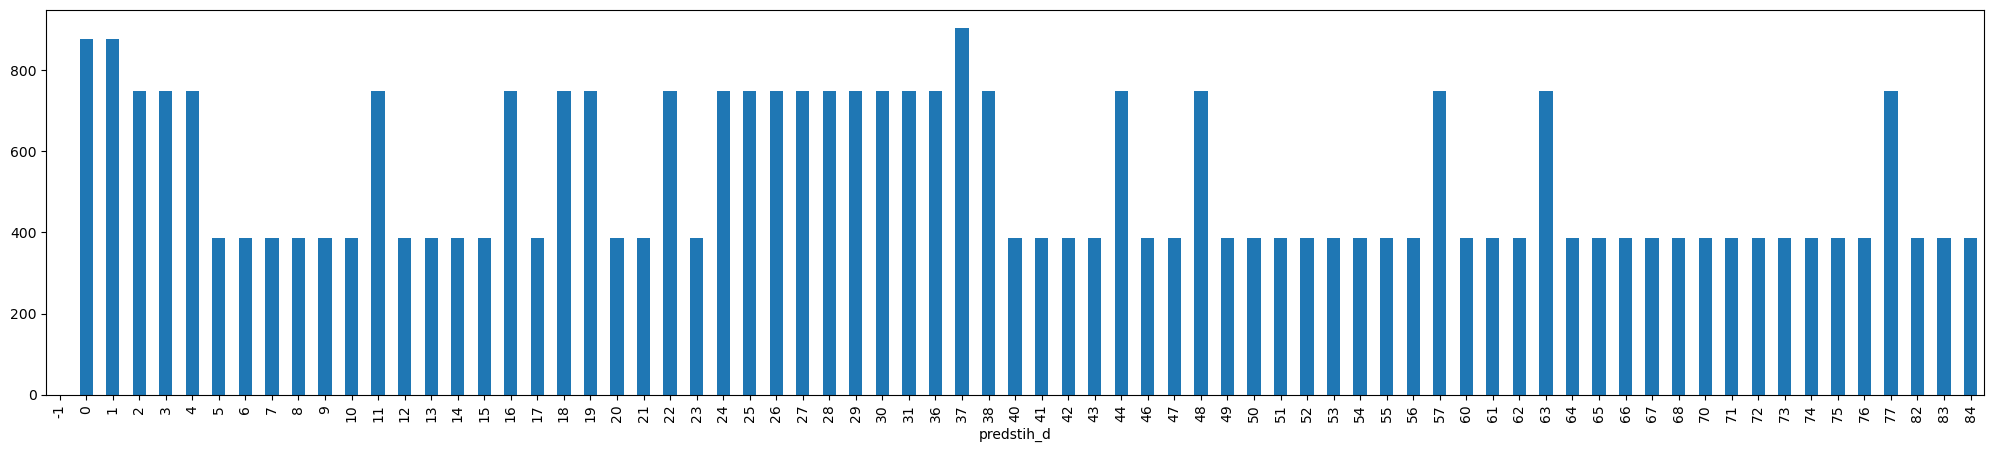

In [138]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Berl')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

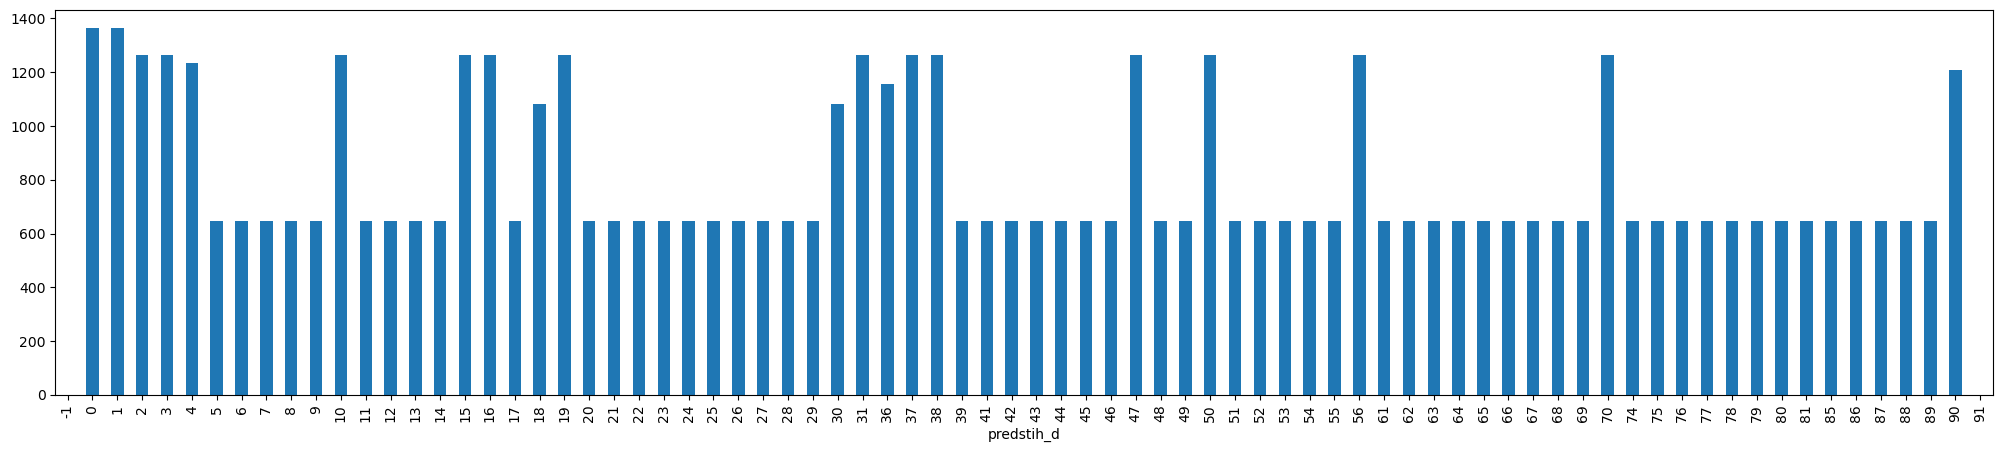

In [139]:
df[df['odkud'].str.contains('Brno') & df['kam'].str.contains('Hamb')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

In [140]:
df.dropna(subset=['cena']).sort_values(by='predstih_d',ascending=False)

,vlaky,prodejce,prostredek,odkud,oscrapovano,kam,odjezd,predstih,vzdalenost,jizdni_doba,...,den,prestupy,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,predstih_d,predstih_h
19883,"[EC 172 Hungaria, ICE 842, RB 10301 Rhein-Nier...",ČD,vlak,Berlin Hbf,2024-11-07 17:59:12,Amsterdam Zuid,2025-02-05 19:46:00,90 days 01:46:48,NaN,1051.0,...,středa,4.0,None,None,NaN,NaN,NaN,NaN,90,2161.780000
8849,[EC 170 Berliner],ČD,vlak,Ústí n.L.hl.n.,2024-11-07 09:07:16,Dresden Hbf,2025-02-05 17:45:00,90 days 08:37:44,86.0,65.0,...,středa,0.0,True,None,NaN,NaN,NaN,NaN,90,2168.628889
8767,[EC 378 Berliner],ČD,vlak,Ústí n.L.hl.n.,2024-11-03 09:49:27,Dresden Hbf,2025-02-01 13:45:00,90 days 03:55:33,86.0,65.0,...,sobota,0.0,True,None,NaN,NaN,NaN,NaN,90,2163.925833
8999,"[rj 256 Vindobona, ICE 700]",ČD,vlak,Brno hl.n.,2024-11-07 09:11:15,Hamburg Hbf,2025-02-05 14:39:00,90 days 05:27:45,NaN,593.0,...,středa,1.0,None,None,NaN,NaN,NaN,NaN,90,2165.462500
8992,"[rj 73 Vindobona, ICE 26, ICE 786]",ČD,vlak,Brno hl.n.,2024-11-07 09:11:15,Hamburg Hbf,2025-02-05 09:22:00,90 days 00:10:45,NaN,632.0,...,středa,2.0,None,None,NaN,NaN,NaN,NaN,90,2160.179167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,[rj 257 Vindobona],ČD,vlak,Praha hl.n.,2024-11-03 11:16:37,Brno hl.n.,2024-11-03 10:44:00,-1 days +23:27:23,255.0,155.0,...,neděle,0.0,True,None,NaN,NaN,NaN,NaN,-1,-0.543611
9226,[rj 257 Vindobona],ČD,vlak,Praha hl.n.,2024-11-03 11:16:59,Wien Hbf,2024-11-03 10:44:00,-1 days +23:27:01,404.0,245.0,...,neděle,0.0,True,None,NaN,NaN,NaN,NaN,-1,-0.549722
67,[],LE,None,Praha-Libeň,2024-11-08 11:08:13,Ostrava-Svinov,2024-11-08 11:07:00,-1 days +23:58:47,NaN,197.0,...,None,NaN,None,None,NaN,NaN,NaN,NaN,-1,-0.020278
19396,"[IC 520 IC 520, RE 18981 S43 18981, RE 26845 R...",ČD,vlak,Berlin Hbf (tief),2024-11-09 17:31:21,Praha hl.n.,2024-11-09 11:16:00,-1 days +17:44:39,NaN,1048.0,...,sobota,4.0,None,None,NaN,NaN,NaN,NaN,-1,-6.255833


In [141]:
df[df['prodejce'] == 'ARR'].groupby('predstih_d').size()

predstih_d
-8         6
-7        12
-6        25
-5        50
-4        69
-3        91
-2       116
-1       138
 0     18943
 1     19490
 2     18025
 3     16238
 4     14120
 5     12319
 6     10626
 7      8997
 8      7398
 9      6239
 10     5089
 11     4089
 12     3201
 13     2419
 14     1807
 15     1358
 16      981
 17      796
 18      673
 19      589
 20      516
 21      444
 22      418
 23      360
 24      306
 25      255
 26      216
 27      184
 28      154
 29      130
 30       86
 31       57
 32       36
 33       25
 34       19
 35        8
 36        2
dtype: int64